In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
def up_lower_sample_data(df, up_percent=0.68, lower_percent=1.88):
    data1= df[df['Churn']==0]  #多樣本
    data0= df[df['Churn']==1]  #低樣本
    np.random.seed(28)      #設定亂樹種子
    up_index = np.random.randint(
        len(data0),size= int(up_percent * (len(df)-len(data0))))
    up_data0 = data0.iloc[list(up_index)]       #上採樣
    lower_index = np.random.randint(
        len(data1),size= int(lower_percent * (len(df)-len(data1))))
    lower_data1= data1.iloc[list(lower_index)]     #下採樣
    return(pd.concat([up_data0,lower_data1]))      #結合上採樣和下採樣

In [ ]:
dataname = "/content/drive/MyDrive/資料探勘/Telecon_1.csv"

data = pd.read_csv(dataname)



#df  = df.drop(columns=['gender','PhoneService','MultipleLines','StreamingTV','StreamingMovies'])
#data = up_lower_sample_data(df)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,tenure2,new_phone_service,new_internet_service,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Monthly_charges2,TotalCharges,totalcharges2,Churn
0,0,0,1,0,1,0,0,1010000,0,1,0,29.85,2,29.85,1,0
1,1,0,0,0,34,2,2,1101000,1,0,1,56.95,3,1889.50,1,0
2,1,0,0,0,2,0,2,1110000,0,1,1,53.85,3,108.15,1,1
3,1,0,0,0,45,3,0,1101100,1,0,2,42.30,3,1840.75,1,0
4,0,0,0,0,2,0,2,2000000,0,1,0,70.70,4,151.65,1,1


In [ ]:
data['tenure']=pd.cut(data['tenure'],bins=5,right=False)
data['tenure'].unique()

[[1.0, 15.2), [29.4, 43.6), [43.6, 57.8), [15.2, 29.4), [57.8, 72.071)]
Categories (5, interval[float64, left]): [[1.0, 15.2) < [15.2, 29.4) < [29.4, 43.6) < [43.6, 57.8) <
                                          [57.8, 72.071)]

In [ ]:
data['MonthlyCharges']=pd.cut(data['MonthlyCharges'],bins=5,right=False)
data['MonthlyCharges'].unique()

[[18.25, 38.35), [38.35, 58.45), [58.45, 78.55), [98.65, 118.85), [78.55, 98.65)]
Categories (5, interval[float64, left]): [[18.25, 38.35) < [38.35, 58.45) < [58.45, 78.55) <
                                          [78.55, 98.65) < [98.65, 118.85)]

In [ ]:
data['TotalCharges']=pd.cut(data['TotalCharges'],bins=5,right=False)
data['TotalCharges'].unique()

[[18.8, 1752.0), [1752.0, 3485.2), [3485.2, 5218.4), [5218.4, 6951.6), [6951.6, 8693.466)]
Categories (5, interval[float64, left]): [[18.8, 1752.0) < [1752.0, 3485.2) < [3485.2, 5218.4) <
                                          [5218.4, 6951.6) < [6951.6, 8693.466)]

In [ ]:
data['tenure']=data['tenure'].astype('str')
data['tenure']=data['tenure'].map({'[1.0, 15.2)':0,'[15.2, 29.4)':1,'[29.4, 43.6)':2,'[43.6, 57.8)':3,'[57.8, 72.071)':4})
data['MonthlyCharges']=data['MonthlyCharges'].astype('str')
data['MonthlyCharges']=data['MonthlyCharges'].map({'[18.25, 38.35)':0,'[38.35, 58.45)':1,'[58.45, 78.55)':2,'[78.55, 98.65)':3,'[98.65, 118.85)':4})
data['TotalCharges']=data['TotalCharges'].astype('str')
data['TotalCharges']=data['TotalCharges'].map({'[18.8, 1752.0)':0,'[1752.0, 3485.2)':1,'[3485.2, 5218.4)':2,'[5218.4, 6951.6)':3,'[6951.6, 8693.466)':4})

In [ ]:
data = data.drop(columns=['tenure2','Monthly_charges2','totalcharges2'])
data = up_lower_sample_data(data)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,new_phone_service,new_internet_service,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4900,1,1,1,0,2,1,2000010,0,1,0,3,1,1
5841,1,1,0,0,4,0,1000011,1,1,0,1,1,1
4965,0,0,0,0,0,0,1001011,0,1,0,1,0,1
3999,0,1,0,0,0,2,2000000,0,1,0,2,0,1
4903,0,0,0,0,0,1,2010010,0,1,0,3,0,1


In [ ]:
data = pd.get_dummies(data, columns=["new_phone_service",
                    "new_internet_service",
                    "Contract",
                    "PaymentMethod"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 4900 to 5814
Columns: 148 entries, gender to PaymentMethod_3
dtypes: int64(9), uint8(139)
memory usage: 1.5 MB


In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,new_phone_service_0,...,new_internet_service_2111101,new_internet_service_2111110,new_internet_service_2111111,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
4900,1,1,1,0,2,1,3,1,1,0,...,0,0,0,1,0,0,1,0,0,0
5841,1,1,0,0,4,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
4965,0,0,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0
3999,0,1,0,0,0,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4903,0,0,0,0,0,1,3,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def ScoreChart(mode, accuracy, recall, precision, f1):
    mode = str(mode)
    t_scores = [accuracy, recall, precision, f1]
    t_scores_name = ['accuracy', 'recall', 'precision', 'f1']
    t_scores_chart = pd.DataFrame(t_scores, t_scores_name)
    if 'y' in mode:
        print(t_scores_chart)


def ScoreReport(y_t, predictions_t):
    accuracy = sklearn.metrics.accuracy_score(y_t, predictions_t)
    recall = sklearn.metrics.recall_score(y_t, predictions_t)
    precision = sklearn.metrics.precision_score(y_t, predictions_t)
    f1 = sklearn.metrics.f1_score(y_t, predictions_t)
    cm = confusion_matrix(y_t, predictions_t)
    print(cm)
    t_scores = [accuracy, recall, precision, f1]
    return t_scores


def ScoreList(mode, y_t, predictions_t):
    mode = str(mode)
    accuracy, recall, precision, f1, cm = ScoreReport(mode, y_t, predictions_t)
    auc_val_value.append(accuracy)
    recall_val_value.append(recall)
    prec_val_value.append(precision)
    f1_val_value.append(f1)
    cm_val_value.append(cm)
    return auc_val_value, recall_val_value, prec_val_value, f1_val_value, cm_val_value


def roc(title, y_t, predictions_t):
    fpr, tpr, thresholds = roc_curve(y_t, predictions_t)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (title, roc_auc))
    #plt.plot([0, 1], [0, 1], color='green', linestyle='--')

def rocshow(title):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

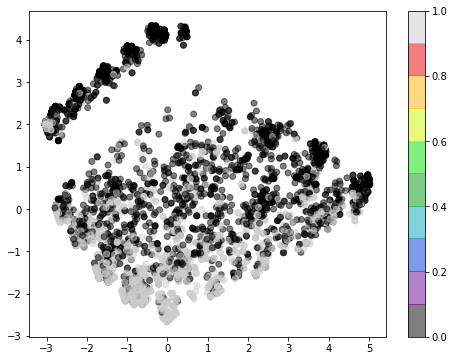

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_training, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import numpy as np
pca5 = PCA(0.9)
X = data.drop('Churn', axis=1)
feature_names = X.columns
pca = pca5.fit(X)
indexes = np.argmax(np.abs(pca.components_), axis=1)
var_ratio = pca.explained_variance_ratio_ * 100
for i, idx in enumerate(indexes):
    print(f'PC{i+1} ({var_ratio[i]:.5f} %) '
          f'feature {idx} ({feature_names[idx]})')
pca.n_components_



PC1 (43.88165 %) feature 4 (tenure)
PC2 (19.97806 %) feature 6 (MonthlyCharges)
PC3 (3.79476 %) feature 10 (new_phone_service_2)
PC4 (3.08673 %) feature 2 (Partner)
PC5 (2.95490 %) feature 143 (PaymentMethod_0)
PC6 (2.62019 %) feature 0 (gender)
PC7 (2.21029 %) feature 7 (TotalCharges)
PC8 (2.10102 %) feature 5 (PaperlessBilling)
PC9 (1.99784 %) feature 5 (PaperlessBilling)
PC10 (1.91835 %) feature 141 (Contract_1)
PC11 (1.71750 %) feature 144 (PaymentMethod_1)
PC12 (1.56111 %) feature 1 (SeniorCitizen)
PC13 (1.37739 %) feature 8 (new_phone_service_0)
PC14 (1.23029 %) feature 142 (Contract_2)


14

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import numpy as np
dx = data
# 取出特徵名稱
X = data.drop('Churn', axis=1)
feature_names = X.columns
pca = PCA().fit(X)
# 依變異解釋能力找出對應特徵
indexes = np.argmax(np.abs(pca.components_), axis=1)
var_ratio = pca.explained_variance_ratio_ * 100
for i, idx in enumerate(indexes):
    print(f'PC{i+1} ({var_ratio[i]:.5f} %) '
          f'feature {idx} ({feature_names[idx]})')

PC1 (99.98542 %) feature 7 (TotalCharges)
PC2 (0.01290 %) feature 6 (MonthlyCharges)
PC3 (0.00161 %) feature 4 (tenure)
PC4 (0.00001 %) feature 10 (new_phone_service_2)
PC5 (0.00001 %) feature 2 (Partner)
PC6 (0.00001 %) feature 2 (Partner)
PC7 (0.00001 %) feature 0 (gender)
PC8 (0.00000 %) feature 5 (PaperlessBilling)
PC9 (0.00000 %) feature 146 (PaymentMethod_3)
PC10 (0.00000 %) feature 141 (Contract_1)
PC11 (0.00000 %) feature 144 (PaymentMethod_1)
PC12 (0.00000 %) feature 1 (SeniorCitizen)
PC13 (0.00000 %) feature 8 (new_phone_service_0)
PC14 (0.00000 %) feature 142 (Contract_2)
PC15 (0.00000 %) feature 3 (Dependents)
PC16 (0.00000 %) feature 76 (new_internet_service_2000000)
PC17 (0.00000 %) feature 12 (new_internet_service_1000000)
PC18 (0.00000 %) feature 79 (new_internet_service_2000011)
PC19 (0.00000 %) feature 77 (new_internet_service_2000001)
PC20 (0.00000 %) feature 78 (new_internet_service_2000010)
PC21 (0.00000 %) feature 103 (new_internet_service_2011011)
PC22 (0.00000 %

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def step(g_y_hat, threshold=0.5):
  return np.where(g_y_hat >= threshold, 1, 0).reshape(-1, 1)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

%matplotlib inline
def up_lower_sample_data(df, up_percent=0.68, lower_percent=1.88):
    data1= df[df['Churn']==0]  #多樣本
    data0= df[df['Churn']==1]  #低樣本
    np.random.seed(28)
    up_index = np.random.randint(
        len(data0),size= int(up_percent * (len(df)-len(data0))))
    up_data0 = data0.iloc[list(up_index)]
    lower_index = np.random.randint(
        len(data1),size= int(lower_percent * (len(df)-len(data1))))
    lower_data1= data1.iloc[list(lower_index)]
    return(pd.concat([up_data0,lower_data1]))

#    arr1 = np.random.randint(6, size=(100,5))
#    arr2 = np.random.randint(1000,1010,size=(10,5))
#    columns = ['A', 'B', 'C', 'D', 'E']
#    df1= pd.DataFrame(arr1, columns=columns)
#    df1['Label']=0
#    df2= pd.DataFrame(arr2, columns=columns)
#    df2['Label']=1
#    df= pd.concat([df1,df2])
#    print(up_lower_sample_data(df))


def lowerSample(df,percent=1):
    data_more = df[df['Churn']==0]  #類別多
    data_less = df[df['Churn']==1]  #類別少
    np.random.seed(61)
    index = np.random.randint(len(data_more),size = percent*(len(df)-len(data_more)))
    lower_data_more = data_more.iloc[list(index)]   #下採樣
    undersampling_data = pd.concat([lower_data_more, data_less])
    return (undersampling_data)
def ScoreChart(mode, accuracy, recall, precision, f1):
    mode = str(mode)
    t_scores = [accuracy, recall, precision, f1]
    t_scores_name = ['accuracy', 'recall', 'precision', 'f1']
    t_scores_chart = pd.DataFrame(t_scores, t_scores_name)
    if 'y' in mode:
        print(t_scores_chart)


def ScoreReport(y_t, predictions_t):
    accuracy = sklearn.metrics.accuracy_score(y_t, predictions_t)
    recall = sklearn.metrics.recall_score(y_t, predictions_t)
    precision = sklearn.metrics.precision_score(y_t, predictions_t)
    f1 = sklearn.metrics.f1_score(y_t, predictions_t)
 #   cm = confusion_matrix(y_t, predictions_t)
 ##   print(cm)
    t_scores = [accuracy, recall, precision, f1]
    return t_scores


def ScoreList(mode, y_t, predictions_t):
    mode = str(mode)
    accuracy, recall, precision, f1, cm = ScoreReport(mode, y_t, predictions_t)
    auc_val_value.append(accuracy)
    recall_val_value.append(recall)
    prec_val_value.append(precision)
    f1_val_value.append(f1)
    cm_val_value.append(cm)
    return auc_val_value, recall_val_value, prec_val_value, f1_val_value, cm_val_value


def roc(title, y_t, predictions_t):
    fpr, tpr, thresholds = roc_curve(y_t, predictions_t)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (title, roc_auc))

def rocshow(title):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

[0.72413793 0.75406504 0.74593496 0.74186992 0.76422764 0.7398374
 0.78861789 0.77845528 0.71544715 0.73577236]
[[764 302]
 [200 844]]
(4921, 14)
(2110, 14)
(4921,)
(2110,)
training set score:0.749
test set socre:0.762
ten cross-validation score:0.749
       Score  Val(mean)      Test
0   accuracy   0.748837  0.762085
1     recall   0.748837  0.808429
2  precision   0.748837  0.736475
3         f1   0.748837  0.770776
[0.7829614604462475, 0.733739837398374, 0.7439024390243902, 0.758130081300813, 0.7459349593495935, 0.7804878048780488, 0.7479674796747967, 0.725609756097561, 0.725609756097561, 0.7459349593495935]
[0.8306451612903226, 0.8024193548387096, 0.7782258064516129, 0.8467741935483871, 0.7813765182186235, 0.8178137651821862, 0.7935222672064778, 0.7449392712550608, 0.805668016194332, 0.7611336032388664]
[0.7601476014760148, 0.708185053380783, 0.7310606060606061, 0.7216494845360825, 0.7310606060606061, 0.7622641509433963, 0.7286245353159851, 0.71875, 0.6958041958041958, 0.7401574803

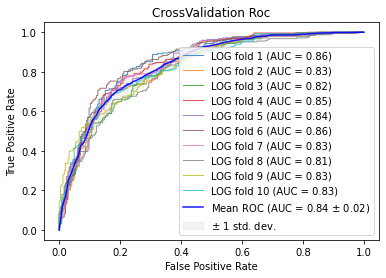

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


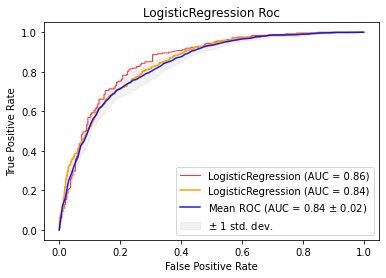

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn import linear_model
import statistics
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn import tree
from sklearn.metrics import classification_report

X = data.drop('Churn', axis=1)  # 刪除target列之欄位
y = data['Churn']

variables = PCA(n_components=14).fit_transform(X)         #PCA主成分分析篩選出來的特徵
type_label = (data['Churn']).values
X_training, X_testing, y_training, y_testing = train_test_split(variables,         #資料切分
                                    type_label,
                                    test_size=0.3,
                                    random_state=39)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)               #10次交叉分析
train_index_list, val_index_list = [], []
auc_list, recall_list, prec_list, f1_list = [], [], [], []
fpr_list, tpr_list = [], []
for train_index, val_index in cv.split(X_training, y_training):

    X_train, X_val = X_training[train_index], X_training[val_index]           #建立驗證集資料
    y_train, y_val = y_training[train_index], y_training[val_index]           #建立驗證集資料

    model = linear_model.LogisticRegression().fit(X_training, y_training)        #模型建立
    model.fit(X_train, y_train)  # 訓練
    predictions_train = model.predict(X_train)                      #訓練集預測
    predictions_val = model.predict(X_val)                        #訓練集預測
    predictions_thresholds = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, predictions_thresholds)          #繪製ROC曲線
    fpr_list.append(fpr)                                  #分類到相關字串
    tpr_list.append(tpr)                                  #分類到相關字串

    accuracy = sklearn.metrics.accuracy_score(y_val, predictions_val)
    recall = sklearn.metrics.recall_score(y_val, predictions_val)
    precision = sklearn.metrics.precision_score(y_val, predictions_val)
    f1 = sklearn.metrics.f1_score(y_val, predictions_val)
    auc_list.append(accuracy)
    recall_list.append(recall)
    prec_list.append(precision)
    f1_list.append(f1)                                   #訓練集模型分數輸出

#model = linear_model.LogisticRegression().fit(X_training, y_training)
#model.fit = ()
predictions = model.predict(X_testing)                            #測試集模型預測
score = cross_val_score(model, X_training, y_training, cv = 10 ,scoring='accuracy')  #10次交叉驗證分數
print(score)
print(confusion_matrix(y_testing,predictions))
print(X_training.shape)
print(X_testing.shape)
print(y_training.shape)
print(y_testing.shape)
print("training set score:{:.3f}".format(model.score(X_training,y_training)))
print("test set socre:{:.3f}".format(model.score(X_testing, y_testing)))
print("ten cross-validation score:{:.3f}".format(np.mean(score)))

ScoresChart = pd.DataFrame(Scores)
print(ScoresChart)
print(auc_list)
print(recall_list)
print(prec_list)
print(f1_list)

tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)
for i in range(0, 10):                           #驗證集ROC曲線
    tprs.append(np.interp(mean_fpr, fpr_list[i], tpr_list[i]))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr_list[i], tpr_list[i])
    aucs.append(roc_auc)
    plt.plot(fpr_list[i], tpr_list[i], lw=1, alpha=0.8,
             label='LOG fold %d (AUC = %0.2f)' % ((i + 1), roc_auc))
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=1.5, alpha=.9)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.1, label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CrossValidation Roc')
plt.legend(loc="lower right")
plt.show()
ax = plt.gca()
tprs.append(np.interp(mean_fpr, fpr_list[0], tpr_list[0]))
tprs[-1][0] = 0.0
roc_auc = auc(fpr_list[0], tpr_list[0])
aucs.append(roc_auc)
plt.plot(fpr_list[0], tpr_list[0], lw=1, alpha=0.8,
label='LogisticRegression (AUC = %0.2f)' %  roc_auc, color='red')


test_roc = plot_roc_curve(model, X_testing, y_testing, ax=ax, color='orange')
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=1.5, alpha=.9)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.1, label=r'$\pm$ 1 std. dev.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression Roc')
plt.legend(loc="lower right")
plt.show()

In [ ]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: -0.31739
Feature: 1, Score: -1.05932
Feature: 2, Score: -0.40746
Feature: 3, Score: -0.53140
Feature: 4, Score: 0.08632
Feature: 5, Score: -0.07564
Feature: 6, Score: -0.45617
Feature: 7, Score: -0.48491
Feature: 8, Score: 0.08988
Feature: 9, Score: 0.22362
Feature: 10, Score: 0.03682
Feature: 11, Score: 0.21073
Feature: 12, Score: 0.61726
Feature: 13, Score: -0.49785


NameError: ignored

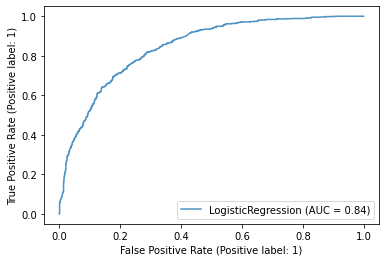

In [ ]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
DT_disp = RocCurveDisplay.from_estimator(model, X_testing, y_testing, ax=ax, alpha=0.8)
#RF=RandomForestClassifier(n_estimators=100, random_state=1).fit( x_train, y_train)
#RF_disp=RocCurveDisplay.from_estimator(RF,Xx_test, y_test, ax=ax, alpha=0.8)
plt.show()